In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import gc
import os
from torchga.torchga import GeometricAlgebra
from torchga.layers import GeometricProductDense, TensorToGeometric, GeometricToTensor
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

In [2]:
ga = GeometricAlgebra([0, 1, 1])
print(ga.basis_mvs)

tensor([[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.]])


In [3]:
def mv_length(mv):
    return torch.sqrt((mv * ~mv).tensor)[..., 0]

def dist_point_line(point, line):
    point_normalized = point.tensor / mv_length(point)
    line_normalized = line.tensor / mv_length(line)
    return ga(point_normalized) & ga(line_normalized)

def dist_points(point_a, point_b):
    point_a_normalized = point_a.tensor / mv_length(point_a)
    point_b_normalized = point_b.tensor / mv_length(point_b)

    return ga(point_a_normalized) & ga(point_b_normalized)

def proj_point_line(point, line):
    return (point | line) * line

def intersect_lines(line_a, line_b):
    return line_a ^ line_b

def point_coordinates(point):
    z = point("12")
    x = point("20") / z
    y = point("01") / z
    return x, y

# Shift up vertically
shift_23 = 0.5 * ga.e01

p_1 = ga(ga.e12 - ga.e01)
p_2 = ga(ga.e12 - ga.e20 + shift_23)
p_3 = ga(ga.e12 + ga.e20 + shift_23)
p_4 = ga(ga.e12 + ga.e01)
p_5 = ga(ga.e12)

l_14 = p_1 & p_4
l_23 = p_2 & p_3

p2_on_l14 = proj_point_line(p_2, l_14)

print("P1:", p_1)
print("P2:", p_2)
print("P3:", p_3)
print("P4:", p_4)
print("P5:", p_5)
print("L14:", l_14)
print("Signed distance between P2 and L14:", dist_point_line(p_2, l_14))
print("Signed distance between P3 and L14:", dist_point_line(p_3, l_14))
print("P2 on L14:", p2_on_l14)

P1: MultiVector[-1.00*e_01 + 1.00*e_12]
P2: MultiVector[0.50*e_01 + 1.00*e_02 + 1.00*e_12]
P3: MultiVector[0.50*e_01 + -1.00*e_02 + 1.00*e_12]
P4: MultiVector[1.00*e_01 + 1.00*e_12]
P5: MultiVector[1.00*e_12]
L14: MultiVector[-2.00*e_1]
Signed distance between P2 and L14: MultiVector[1.00*1]
Signed distance between P3 and L14: MultiVector[-1.00*1]
P2 on L14: MultiVector[2.00*e_01 + 4.00*e_12]


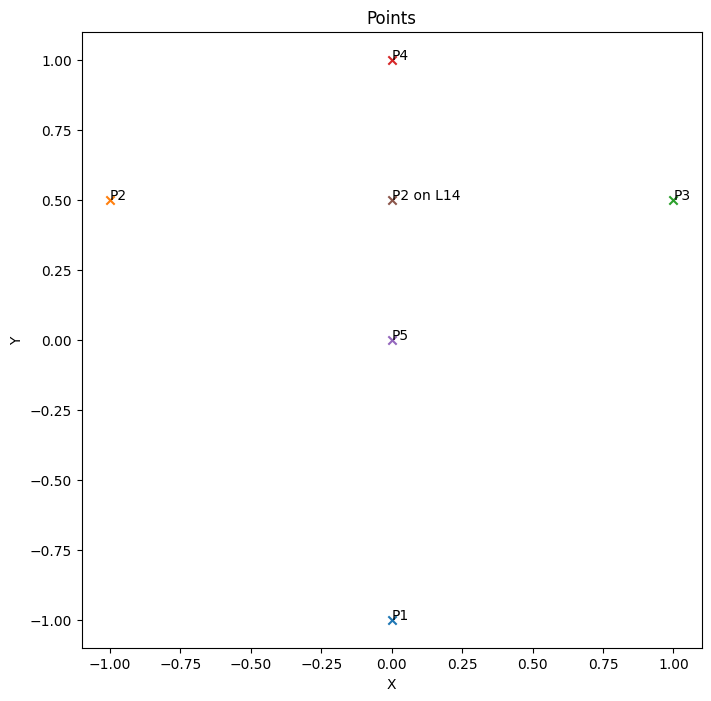

In [4]:
# Plot the results

def plot_point(point, name):
    xy = point_coordinates(point)
    plt.scatter(*xy, marker="x")
    plt.annotate(name, xy)

plt.figure(figsize=(8, 8))
plot_point(p_1, "P1")
plot_point(p_2, "P2")
plot_point(p_3, "P3")
plot_point(p_4, "P4")
plot_point(p_5, "P5")
plot_point(p2_on_l14, "P2 on L14")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Points")
plt.show()